## **Webscraping**

##### **Name**  : Livia Amanda Annafiah
-------

##### **Program Description**
This program aims to perform web scraping on the Tokopedia e-commerce platform to retrieve data, process it, and analyze sales of specific product to facilitate decision-making.

#### **A. Web Scraping**

The goal is to explore dropshipping to generate income, but there's uncertainty about the product to sell. After thorough consideration, the decision is to focus on marketing seblak. However, prior to proceeding, a market analysis is necessary to assess the demand and profit potential of selling seblak. The objective is to analyze seblak sales performance and determine the level of consumer interest in this product.

The initial step involves **web scraping** data from Tokopedia e-commerce to gather information on seblak sales. This step extracted product details which are product names, prices, seller info, location, amount sold, and rating. Analyzing this data provides insights into market trends and consumer preferences.

In [53]:
# Import library for web scraping
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

# Import library for statistical analysis
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

From the code cell below, there are some cells that are commented. This is due to the web scraping process which tends to have different classes each time. Therefore, the web scrape process is only run once.

In [54]:
# Define the URL
url="https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st="

# Initialize a Chrome webdriver and open the webpage
driver = webdriver.Chrome()
driver.get(url)

# Get the HTML source code of the webpage
html = driver.page_source

# Parse the HTML source code using BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

In these steps, the process begins with the definition of the URL, directing to the Tokopedia search page for 'seblak' products. Subsequently, a Chrome webdriver is initialized using Selenium, which then opens the URL. Then, the HTML source code of the webpage is extracted. Finally, BeautifulSoup is utilized to parse the HTML source, facilitating the extraction of relevant data.

In [55]:
# Make an empty list
productName = []
price = []
seller = []
location = []
amountSold = []
rating = []
seen_products = []

# Looping through the first 10 pages
for i in range(1,11):
    url="https://www.tokopedia.com/search?navsource=&page={}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=".format(i)
    driver.get(url)
    html = driver.page_source
    time.sleep(0.5) # Add a delay
    soup = BeautifulSoup(html, "html.parser")

    # Extract information from the webpage and adding it to the empty list
    for item in soup.find_all('div', {"class": "css-1asz3by"}):

        try:
            productName.append(item.find('div', {"class": "prd_link-product-name css-3um8ox"}).text.strip())  
        except AttributeError:
            productName.append(None)

        try:
            price.append(item.find('div', {"class": "prd_link-product-price css-h66vau"}).text.strip())
        except AttributeError:
            price.append(None)

        try:
            seller.append(item.find('span', {"class": "prd_link-shop-name css-1kdc32b flip"}).text.strip())
        except AttributeError:
            seller.append(None)

        try:
            location.append(item.find('span', {"class": "prd_link-shop-loc css-1kdc32b flip"}).text.strip())
        except AttributeError:
            location.append(None)

        try:
            amountSold.append(item.find('span', {"class": "prd_label-integrity css-1sgek4h"}).text.strip())
        except AttributeError:
            amountSold.append(None)

        try:
            rating.append(item.find('span', {"class": "prd_rating-average-text css-t70v7i"}).text.strip())
        except AttributeError:
            rating.append(None)

# Closes the webdriver
driver.quit()

# Converts list to a dataframe
data_multipage = pd.DataFrame()
data_multipage['Product Name'] = productName
data_multipage['Price'] = price
data_multipage['Seller'] = seller
data_multipage['Location'] = location
data_multipage['Amount Sold'] = amountSold
data_multipage['Rating'] = rating

# Show dataframe
data_multipage

During this stage, the process scrapes Tokopedia's e-commerce platform for 'seblak' products across 10 pages. The essential details are collected and appended to empty lists. Using the inspect element feature, classes, divs, and spans are identified and extracted.

There are some products from new seller that doesn't have any ratings or amount sold yet. To address missing values and maintain consistent list lengths, any missing data is designated as `None`. Following this, a DataFrame is generated from the information.

In [56]:
# Save the dataframe to csv format
data_multipage.to_csv('rawData.csv', index=False)

Once the DataFrame has been generated, it can be transformed into CSV format for additional analysis, removing the need to scrape the web again.

#### **B. Data Preparation**

##### **1. Data Exploration**

In [57]:
# Reads csv file and save it to a variable
df = pd.read_csv("rawData.csv")

# Show dataframe
df

,Product Name,Price,Seller,Location,Amount Sold,Rating
0,Kylafood Seblak Mie Baso Sapi Play,Rp24.200,NaN,NaN,250+ terjual,4.9
1,Kylafood Seblak karuhun,Rp9.450,NaN,NaN,4 rb+ terjual,4.8
2,Kylafood Paket (3 Seblak Original 2 Batagor kuah),Rp97.200,NaN,NaN,3 rb+ terjual,4.9
3,Kylafood Seblak Original,Rp19.800,kylafood,Bandung,10rb+ terjual,4.9
4,"Seblak Rafael, Seblak Coet Instan Halal",Rp23.750,Brother Meat Shop,Depok,500+ terjual,4.9
...,...,...,...,...,...,...
352,[250 gr] Kerupuk Seblak Pedas,Rp11.500,CamilanJati,Kab. Sidoarjo,40+ terjual,5.0
353,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+ terjual,4.8
354,Seblak Instan Komplit Pedas Gurih Nikmat,Rp5.999,Baso Aci Ayang,Kab. Garut,3rb+ terjual,4.9
355,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+ terjual,4.8


This code segment reads a CSV file, displaying the dataframe of the first 5 rows and last 5 rows. It accurately retrieves the relevant information from the data, including the detection and handling of NaN values, indicating missing data.

In [58]:
# Show the summary information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  357 non-null    object 
 1   Price         357 non-null    object 
 2   Seller        340 non-null    object 
 3   Location      340 non-null    object 
 4   Amount Sold   351 non-null    object 
 5   Rating        338 non-null    float64
dtypes: float64(1), object(5)
memory usage: 16.9+ KB


The summary, obtained from the `info` method, indicates a dataset of 357 rows and 6 columns. These columns are `Product Name`, `Price`, `Seller`, `Location`, `Amount Sold`, and `Rating`. There are no null values for the product name and price columns, although several null values are present in other columns. The datatypes includes 1 float and 5 objects.

These findings indicate that the datatypes of certain columns need to be adjusted to their appropriate types.

In [59]:
# Show summary statistics of the data
df.describe()

,Rating
count,338.000000
mean,4.886391
std,0.097405
min,4.200000
25%,4.800000
50%,4.900000
75%,4.975000
max,5.000000


The `describe` method provides a statistical summary of the data. Since the only numeric column currently is the rating, it displays statistics for the rating column only. Statistics include count, mean, standard deviation (std), minimum and maximum value, and quartiles.

In [60]:
# Counts occurrences of every unique value
df.value_counts()

Product Name                                                        Price     Seller                          Location           Amount Sold    Rating
Seblak Rafael, Seblak Coet Instan Halal                             Rp23.750  Brother Meat Shop               Depok              500+ terjual   4.9       33
Seblak Rafael/Seblak Coet Instan Halal                              Rp26.600  Foodstocks                      Jakarta Selatan    50+ terjual    5.0       33
SEBLAK INSTANT TERMURAH                                             Rp4.450   Pusat Cuankie & Cemilan Frozen  Jakarta Timur      10rb+ terjual  4.8       21
Seblak Instan Pedas Home Made                                       Rp3.500   the Dhecip                      Tangerang Selatan  3rb+ terjual   4.9       20
Kylafood Seblak Rempah Autentik 115gr, Seblak Instan Halal          Rp9.405   Brother Meat Shop               Depok              100+ terjual   4.9       13
                                                                

The `value_counts` method helps to understand how often each value appears. Looking at the results, it's clear that some rows occur multiple times. For instance, the first two rows are repeated 33 times, the third row appears 21 times, and so forth. This indicates there are numerous duplicates in the dataframe. This may occur because certain sections like "seblak instan," "seblak kering," "seblak rafael," keep showing up across different pages with identical attributes. Hence, it's necessary to clean up these duplicates from the dataset.

In [61]:
# Total count of missing values
df.isnull().sum().sum()

59

The `isnull().sum().sum()` methods indicate a total count of missing values. This suggests there are 59 occurrences of `None` or missing values within the dataset.

In [62]:
# Counting missing values in each column
df.isnull().sum()

Product Name     0
Price            0
Seller          17
Location        17
Amount Sold      6
Rating          19
dtype: int64

To identify the columns containing missing values, utilize the `isnull().sum()` method. This analysis reveals that the `Seller` and `Location` columns each have 17 missing values, the `Amount Sold` column has 6, and the `Rating` column has 19 missing values.

In this analysis, missing values will be managed by eliminating rows that have missing values, thereby ensuring the significance of the analysis.

In [63]:
# Total count of duplicated values
df.duplicated().sum()

243

The `duplicated().sum()` method indicates a total of 243 duplicated rows out of 357 rows. This implies that after cleaning, the dataframe would have 114 unique values remaining. In this case, the number of unique values is acceptable.

In [64]:
# Check data types
df.dtypes

Product Name     object
Price            object
Seller           object
Location         object
Amount Sold      object
Rating          float64
dtype: object

To verify the data types, the `dtypes` method can be utilized. As previously mentioned, the data types remain incorrect and need adjustment according to their values.

In [65]:
# Unique value of Product Name column
df['Product Name'].unique()

array(['Kylafood Seblak Mie Baso Sapi Play', 'Kylafood Seblak karuhun',
       'Kylafood Paket (3 Seblak Original 2 Batagor kuah)',
       'Kylafood Seblak Original',
       'Seblak Rafael, Seblak Coet Instan Halal',
       'Kylafood Seblak Rempah Autentik 115gr, Seblak Instan Halal',
       'Seblak Rafael/Seblak Coet Instan Halal',
       'kerupuk seblak kencur pedas', 'SEBLAK INSTANT TERMURAH',
       'KERUPUK SEBLAK PEDAS DAUN JERUK 100 GR',
       'Seblak Instan Pedas Home Made',
       'Kylafood Seblak Cup Instan, Halal',
       'KERUPUK SEBLAK PEDAS / KRUPUK SEBLAK KERING DAUN JERUK PEDES',
       'Kerupuk Seblak / Seblak / Kering Pedas /',
       'seblak kering pedas 250 gr/seblak kencur/kerupuk seblak,enak dan gurih',
       'SEBRING KRUPUK KERUPUK SEBLAK KERING PEDAS DAUN JERUK 1KG CABE ASLI',
       'kerupuk seblak kering pedas 1 kg keripik hot spicy camilan kekinian',
       'Seblak RAFAEL | Seblak MAMANG RAFAEL | Seblak Viral ORIGINAL TATANGGA',
       'Krupuk seblak mawar 

From the provided code, the `unique` method is used to display the unique values within the `Product Name` column. No issues are identified in these findings.

In [66]:
# Unique value of Price column
df['Price'].unique()

array(['Rp24.200', 'Rp9.450', 'Rp97.200', 'Rp19.800', 'Rp23.750',
       'Rp9.405', 'Rp26.600', 'Rp15.000', 'Rp4.450', 'Rp4.500', 'Rp3.500',
       'Rp11.500', 'Rp25.000', 'Rp10.000', 'Rp9.999', 'Rp16.000',
       'Rp41.000', 'Rp39.500', 'Rp12.500', 'Rp5.999', 'Rp24.000',
       'Rp47.260', 'Rp56.300', 'Rp18.500', 'Rp7.000', 'Rp50.000',
       'Rp28.000', 'Rp9.750', 'Rp34.999', 'Rp17.300', 'Rp19.500',
       'Rp25.500', 'Rp13.999', 'Rp7.138', 'Rp4.750', 'Rp3.800',
       'Rp55.000', 'Rp10.600', 'Rp22.000', 'Rp130.000', 'Rp46.500',
       'Rp32.500', 'Rp17.000', 'Rp26.000', 'Rp19.700', 'Rp13.900',
       'Rp5.579', 'Rp115.000', 'Rp26.500', 'Rp5.000', 'Rp20.000',
       'Rp25.800', 'Rp21.000', 'Rp26.970', 'Rp30.500', 'Rp22.140',
       'Rp12.250', 'Rp4.999', 'Rp34.980', 'Rp16.800', 'Rp18.900',
       'Rp18.000', 'Rp25.900', 'Rp27.500', 'Rp3.499', 'Rp6.000',
       'Rp4.250', 'Rp699', 'Rp120.000', 'Rp7.500', 'Rp14.999', 'Rp15.300',
       'Rp13.000', 'Rp44.500', 'Rp35.000', 'Rp17.700', 'R

In the `Price` column, adjustments are needed to convert the data type to `Integer`. This involves removing the currency symbol "Rp" and any decimal points "." from the values.

In [67]:
# Unique value of Seller column
df['Seller'].unique()

array([nan, 'kylafood', 'Brother Meat Shop', 'Foodstocks',
       'snack neng nabila', 'Pusat Cuankie & Cemilan Frozen',
       'BociKakang', 'the Dhecip', 'LEGIT SNACK', 'Anggris store',
       'aghniya', 'Aydaa Snack', 'JAGO TOK PETOK', 'Beauty DELUXE',
       'Markas Makaroni', 'CamilanJati', 'Lidigeli', 'Baso Aci Ayang',
       'aurel prima snack', 'Toko Yazid Cita Rasa', 'Rak Sebelah',
       'Mandumpang Jaya Olshop', 'global cookware1', 'home_nature',
       'siskaarinang2', 'Kenal Jaya Bandung', 'CUANKI CULAMETAN',
       'CuankiCulametan', 'Berkah Food Bandung', 'yohangunawan94',
       'NomeL Shop', 'Pelangi Girls Naget 2', 'kira3arut',
       'Bung Boe Snack', 'Snack Zone Official',
       'Gerai Snack Official Shop', 'gaiagarut', 'Semesta kerupuk',
       'Seblak Jeletet Murni', 'keripikususkrisis',
       'Pisang Goreng Madu Bu Nanik', 'Utama.Snack', 'Snackzone PP',
       'dakar_ofc', 'MSH Rempah', 'RIKI STORE 97',
       'Agen bawang goreng mas YO', 'DRSukses', 'DelimaFCB

The values in the `Seller` column appear to be correct without any issues, only the nan values.

In [68]:
# Unique value of Location column
df['Location'].unique()

array([nan, 'Bandung', 'Depok', 'Jakarta Selatan', 'Jakarta Timur',
       'Tangerang Selatan', 'Jakarta Barat', 'Kab. Bogor', 'Surakarta',
       'Surabaya', 'Kab. Bekasi', 'Kab. Sidoarjo', 'Kab. Garut',
       'Jakarta Pusat', 'Kab. Tangerang', 'Cimahi', 'Kab. Sumedang',
       'Kab. Gresik', 'Kab. Mojokerto', 'Kab. Bandung', 'Semarang',
       'Tangerang', 'Makassar'], dtype=object)

The `Location` columns also appears to be correct, although there are still nan values.

In [69]:
# Unique value of Amount Sold column
df['Amount Sold'].unique()

array(['250+ terjual', '4 rb+ terjual', '3 rb+ terjual', '10rb+ terjual',
       '500+ terjual', '100+ terjual', '50+ terjual', nan, '3rb+ terjual',
       '70+ terjual', '40+ terjual', '30+ terjual', '14 terjual',
       '3 terjual', '6 terjual', '60+ terjual', '11 terjual',
       '7rb+ terjual', '1rb+ terjual', '90+ terjual', '9 terjual',
       '80+ terjual', '19 terjual', '2rb+ terjual', '2 terjual',
       '4rb+ terjual', '750+ terjual', '26 terjual', '20 terjual',
       '17 terjual', '7 terjual', '16 terjual', '15 terjual', '1 terjual',
       '10 terjual', '8 terjual', '4 terjual', '5 terjual', '28 terjual',
       '27 terjual'], dtype=object)

The `Amount Sold` column requires some adjustments. The word "terjual" should be removed to convert the data type to `Integer`. Additionally, the character "+" should be removed, and the word "rb" should be replaced with "000".

In [70]:
# Unique value of Rating column
df['Rating'].unique()

array([4.9, 4.8, 5. , nan, 4.7, 4.4, 4.6, 4.5, 4.2])

In the `Rating` column, the `None` or `nan` values should be replaced with 0 to align with the data type adjustment to `Float`. However, the missing values would be removed anyway.

##### **2. Data Cleaning**

In [71]:
# Reads csv file and save it to a variable
df = pd.read_csv("rawData.csv")

In [72]:
# Removing duplicated rows
df = df.drop_duplicates()

The inital step to clean the data is to remove duplicated rows using `drop_duplicates()`.

In [73]:
# Removing missing values rows
df = df.dropna()

As previously mentioned, rows containing missing values will be eliminated using the `dropna()` method.

In [74]:
df.isnull().sum()

Product Name    0
Price           0
Seller          0
Location        0
Amount Sold     0
Rating          0
dtype: int64

In [75]:
# Cleaning the Amount Sold column

df.loc[:, 'Amount Sold'] = df.loc[:, 'Amount Sold'].str.replace(' terjual', '', regex=True)
df.loc[:, 'Amount Sold'] = df.loc[:, 'Amount Sold'].str.replace('rb', '000', regex=True)
df.loc[:, 'Amount Sold'] = df.loc[:, 'Amount Sold'].str.replace(r'\+', '', regex=True)
df.loc[:, 'Amount Sold'] = df.loc[:, 'Amount Sold'].str.replace(' ', '', regex=True)

# Print unique values to verify changes
df['Amount Sold'].unique()

array(['10000', '500', '100', '50', '3000', '70', '40', '250', '30', '14',
       '6', '60', '11', '7000', '1000', '90', '9', '80', '19', '2000',
       '4000', '750', '26', '20', '17', '7', '16', '1', '10', '8', '4',
       '5', '28', '27'], dtype=object)

The code above cleans the `Amount Sold` column by removing "terjual," replacing "rb" with "000," removing "+", spaces, and filling NaN values with 0. This ensures uniformity and prepares the data for further analysis.

In [76]:
# Cleaning the Price column

df.loc[:, 'Price'] = df.loc[:, 'Price'].str.replace('Rp', '', regex=True)
df.loc[:, 'Price'] = df.loc[:, 'Price'].str.replace(r'\.', '', regex=True)

# Print unique values to verify changes
df['Price'].unique()

array(['19800', '23750', '9405', '26600', '4450', '4500', '3500', '11500',
       '25000', '10000', '9999', '16000', '41000', '39500', '12500',
       '15000', '5999', '24000', '47260', '56300', '24200', '18500',
       '7000', '50000', '28000', '9750', '34999', '17300', '19500',
       '25500', '13999', '7138', '4750', '3800', '55000', '10600',
       '32500', '26000', '19700', '13900', '5579', '115000', '26500',
       '5000', '25800', '21000', '26970', '30500', '22140', '12250',
       '4999', '34980', '18000', '25900', '27500', '3499', '6000', '4250',
       '699', '120000', '7500', '14999', '15300', '13000', '44500',
       '17700', '7999', '12700', '14550', '25380', '8000'], dtype=object)

This part cleans the `Price` column by removing "Rp", decimal points ".", and replacing empty strings or 'nan' with '0'. This ensures consistency in the data.

In [77]:
# Then apply type conversions safely
df['Amount Sold'] = pd.to_numeric(df['Amount Sold'], errors='coerce').astype(int)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').astype(int)

# Check the data types again to confirm
print(df.dtypes)

Product Name     object
Price             int32
Seller           object
Location         object
Amount Sold       int32
Rating          float64
dtype: object


The provided code fill None values to 0 and modifies the data types of specific columns:

- `Price` column is converted to integer.
- `Amount Sold` column is converted to integer.
- `Rating` column is converted to float.

It appears that the data types have been successfully adjusted to match the expected format.

In [78]:
# Save cleaned data to csv
df.to_csv('cleanData.csv', index=False)

After cleaning, the processed data is saved in CSV format to continue analyzing it further.

#### **C. Business Understanding/Problem Statement**

In this section, the SMART method is applied to analyze the problem statement:

- **Specific** :
The goal is to evaluate seblak product performance for dropshipping, aligning with the seller's objective of maximizing income.

- **Measurable** :
The objective is to enhance the profit margin by 5% from previous sales, specifically from 90% to 95%.

- **Achievable** :
 Achieving a 5% increase in profit margin is feasible through effective market analysis and strategic decision-making.

- **Relevant** :
Evaluating the profit potential of selling seblak directly aligns with the objective of maximizing income through dropshipping.

- **Time-based** :
The profit margin increase goal will be achieved within 6 months, allowing market analysis, strategic adjustments, and implementation of new selling strategies.

**Conclusion**

The seller's objective is to optimize profit margins from 90% to 95% within a 6-month period through market analysis and dropshipping practices.

#### **D. Analysis**

##### **Data Load**

In [79]:
# Reads the file and save it to a variable
data = pd.read_csv('cleanData.csv')

##### **Central Tendency**

To address the problem statement provided, the first step involves analyzing the central tendency and the normality test to check the distribution. This analysis focuses on three columns: `Price`, `Amount Sold`, and `Rating`. The central tendency metrics to be computed include the mean, median, mode, standard deviation, skewness, and kurtosis.

In [80]:
# Count central tendency and normality test

print("Price\n")
print(f"Mean: {data['Price'].mean():.2f}")
print(f"Median: {data['Price'].median():.2f}")
print(f"Mode: {data['Price'].mode().values[0]:.2f}")
print(f"Standard Deviation: {data['Price'].std():.2f}")
print(f"Skewness: {data['Price'].skew()}")
print(f"Kurtosis: {data['Price'].kurtosis()}")

Price

Mean: 19751.56
Median: 15000.00
Mode: 15000.00
Standard Deviation: 19135.14
Skewness: 3.1920465276612435
Kurtosis: 13.752323889876296


From the `Price` column, it can be concluded that:
- **Mean:** The average price of the products is Rp19,751.56.

- **Median:** The median price, representing the middle value, is Rp15,000.00.

- **Mode:** The  most frequent value, of the prices is Rp15,000.00.

- **Standard Deviation:** The standard deviation of the price is Rp19.135.14.

- **Skewness:** The skewness value of 3.19 indicates that the distribution of prices is highly skewed to the right, which means that there are a smaller number of very high-priced items pulling the average up. The skewness of a normal distribution supposed to be 0.

- **Kurtosis:** The kurtosis value of 13.75 suggests that the distribution is more peaked than a normal distribution or is usually called Leptokurtic. This indicates a high level of outliers and extreme values in the data. The kurtosis of a normal distribution supposed to be 0.

Overall, the distribution of prices appears to be heavily skewed to the right with a high degree of kurtosis, indicating **non-normality** and a **presence of outliers**.

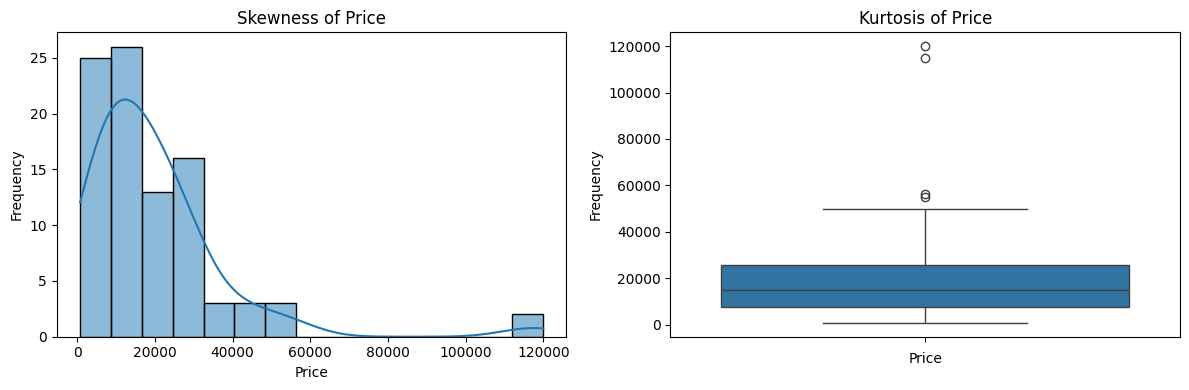

In [81]:
# Create a figure side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot skewness
sns.histplot(data['Price'], kde=True, ax=axes[0])
axes[0].set_title('Skewness of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot kurtosis
sns.boxplot(data['Price'], ax=axes[1])
axes[1].set_title('Kurtosis of Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

For clarity, the provided figures illustrate the Skewness and Kurtosis of the price. The skewness plot reveals a highly skewed to the right, with the highest frequency observed around Rp15,000. Conversely, the kurtosis plot indicates a distribution with a few outliers or extreme values compared to a normal distribution.

In summary, the data is **not normally distributed**. However, in this case, there's no need to handle outliers as they naturally exist within the dataset.

In [82]:
# Count central tendency and normality test

print("Amount Sold\n")
print(f"Mean: {round(data['Amount Sold'].mean())}")
print(f"Median: {data['Amount Sold'].median()}")
print(f"Mode: {data['Amount Sold'].mode().values[0]}")
print(f"Standard Deviation: {round(data['Amount Sold'].std()):.2f}")
print(f"Skewness: {data['Amount Sold'].skew()}")
print(f"Kurtosis: {data['Amount Sold'].kurtosis()}")

Amount Sold

Mean: 782
Median: 100.0
Mode: 100
Standard Deviation: 2010.00
Skewness: 3.706340569129557
Kurtosis: 13.9285217710579


From the `Amount Sold` column, it can be concluded that:
- **Mean:** The average amount sold of the products is 782.

- **Median:** The median amount sold, representing the middle value, is 100 products.

- **Mode:** The  most frequent value, of the amount sold is 100 products.

- **Standard Deviation:** The standard deviation of the amount sold is 2010.

- **Skewness:** The skewness value of 3.71 indicates that the distribution of amount sold is again highly skewed to the right, which means that there are fewer occurrences of high sales amounts compared to moderate or low sales amounts.

- **Kurtosis:** The kurtosis value of 13.93 suggests that the distribution is more peaked than a normal distribution or is usually called Leptokurtic. This indicates a high level of outliers and extreme values in the data. The kurtosis of a normal distribution supposed to be 0.

Overall, the distribution of amount sold is also appears to be heavily skewed to the right with a high degree of kurtosis, indicating **non-normality** and a **presence of outliers**.

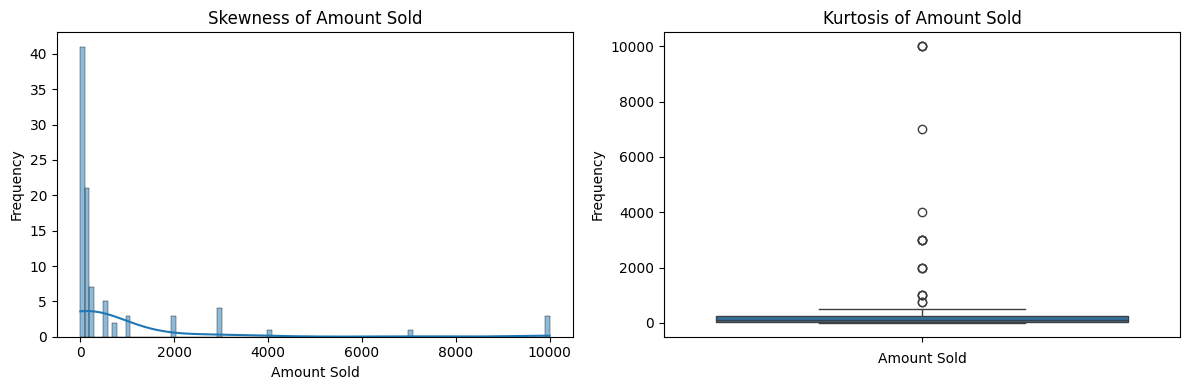

In [83]:
# Create a figure side by side
fig1, axes1 = plt.subplots(1, 2, figsize=(12, 4))

# Plot skewness
sns.histplot(data['Amount Sold'], kde=True, ax=axes1[0])
axes1[0].set_title('Skewness of Amount Sold')
axes1[0].set_xlabel('Amount Sold')
axes1[0].set_ylabel('Frequency')

# Plot kurtosis
sns.boxplot(data['Amount Sold'], ax=axes1[1])
axes1[1].set_title('Kurtosis of Amount Sold')
axes1[1].set_xlabel('Amount Sold')
axes1[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

For clarity, the provided figures illustrate the Skewness and Kurtosis of the amount sold. The skewness plot reveals a more highly skewed to the right than the price. The kurtosis plot indicates a distribution with numerous outliers or extreme values compared to a normal distribution.

In summary, the data is **not normally distributed**. However, in this case, there's no need to handle outliers as they naturally exist within the dataset.

In [84]:
# Count central tendency and normality test

print("Rating\n")
print(f"Mean: {data['Rating'].mean()}")
print(f"Median: {data['Rating'].median()}")
print(f"Mode: {data['Rating'].mode().values[0]}")
print(f"Standard Deviation: {data['Rating'].std():.2f}")
print(f"Skewness: {data['Rating'].skew()}")
print(f"Kurtosis: {data['Rating'].kurtosis()}")

Rating

Mean: 4.892307692307692
Median: 4.9
Mode: 4.9
Standard Deviation: 0.14
Skewness: -2.4789607492955232
Kurtosis: 8.69664867336837


From the `Rating` column, it can be concluded that:
- **Mean:** The average rating of the products is 4.89. This indicates the average rating given in the dataset suggests items are rated quite positively.

- **Median:** The median rating, representing the middle value, is 4.9. The fact that the median is higher than the mean suggests that there might be some lower ratings dragging the mean down.

- **Mode:** The  most frequent value, of the rating is 4.9.

- **Standard Deviation:** The standard deviation of the rating is 0.14. A smaller standard deviation indicates that the ratings tend to be closer to the mean, while a larger standard deviation would suggest more variability in the ratings.

- **Skewness:** The skewness value of -2.48 indicates that the distribution of rating is highly skewed to the left. This suggests that there may be a larger number of high ratings compared to low ratings.

- **Kurtosis:** The kurtosis value of 8.70 suggests that the distribution is more peaked than a normal distribution or is usually called Leptokurtic. This indicates a high level of outliers and extreme values in the data. The kurtosis of a normal distribution supposed to be 0.

Overall, the distribution of rating appears to be heavily skewed to the left with a high degree of kurtosis, indicating **non-normality** and a **presence of outliers**.

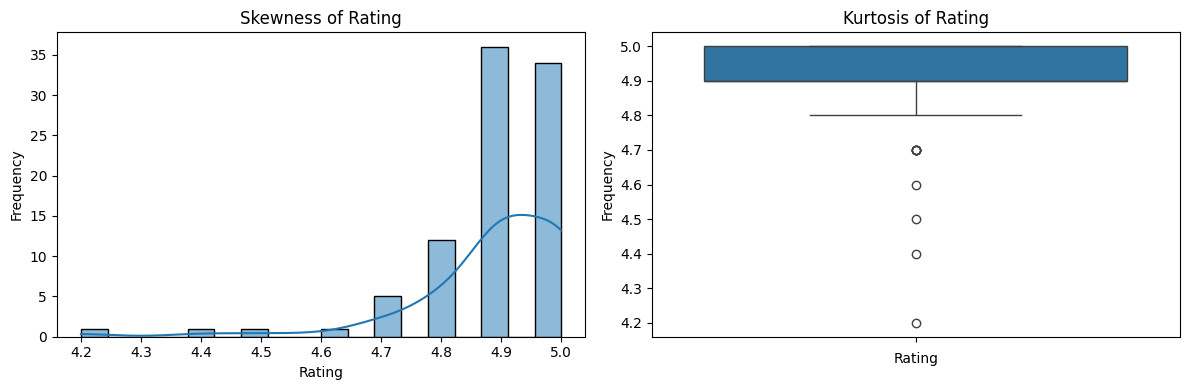

In [85]:
# Create a figure side by side
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4))

# Plot skewness
sns.histplot(data['Rating'], kde=True, ax=axes2[0])
axes2[0].set_title('Skewness of Rating')
axes2[0].set_xlabel('Rating')
axes2[0].set_ylabel('Frequency')

# Plot kurtosis
sns.boxplot(data['Rating'], ax=axes2[1])
axes2[1].set_title('Kurtosis of Rating')
axes2[1].set_xlabel('Rating')
axes2[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The histogram showing the skewness of the rating reveals a high frequency of ratings at the upper end of the scale, with the mode at 4.9, indicating that the most common rating is very high. This pattern of concentration toward the higher end and fewer low ratings indicates that the majority of the products being rated are perceived positively. The lower ratings, which are relatively few, create a tail on the left side of the distribution making it a left-skewed.

In summary, the data is **not normally distributed**. However, in this case, there's no need to handle outliers as they naturally exist within the dataset.

##### **Confidence Interval**

The seller is interested in determining the potential income range from selling Seblak, using a 95% confidence interval. This crucial analysis provides an estimate of earnings, assisting in evaluating the financial prospects and profitability of the Seblak selling venture. By pinpointing these income thresholds, sellers can make well-informed decisions, preparing for both the best and worst financial outcomes.

In [86]:
# Calculate income from sales
data['Income'] = data['Price'] * data['Amount Sold']

# Count standard deviation
std = data['Income'].std()

# Sample size
n = len(data)

# Count 95% confidence interval for mean income
low, up = stats.norm.interval(0.95,loc=data['Income'].mean(),scale=std/np.sqrt(n))
print(f'Lower Limit: {low}')
print(f'Upper Limit: {up}')

Lower Limit: 3587150.109336596
Upper Limit: 20722713.319234833


The previous analysis concluded that the data doesn't follow a normal distribution. Usually, different methods are needed to calculate confidence intervals for non-normal data. However, in this case, it is **assumed** that the data is **distributed normally**.

The calculated confidence interval suggests that the potential monthly income from selling Seblak ranges between **Rp3,587,150** and **Rp20,722,713** with a 95% level of confidence. This indicates that, based on the data analyzed, there is a high probability that the actual average income falls within this range.

##### **Hypothesis Testing**

Next, the seller aims to understand the difference between selling prices in the Jabodetabek area and regions outside of it. To achieve this, the Two-Sample Independent Test will be used.

In [87]:
# Stating Jabodetabek area
area = ['Depok','Jakarta Selatan','Jakarta Timur','Tangerang Selatan','Jakarta Barat','Kab. Bogor','Kab. Bekasi',
        'Jakarta Pusat','Kab. Tangerang','Tangerang']

# Calculate mean price Jabodetabek
priceJabodetabek = data[data['Location'].isin(area)]
meanPriceJabodetabek = priceJabodetabek['Price'].mean()

# Calculate mean price Others
priceOthers = data[~data['Location'].isin(area)]
meanPriceOthers = priceOthers['Price'].mean()

# Show results
print(f"Mean price Jabodetabek: Rp{meanPriceJabodetabek}")
print(f"Mean price others: Rp{meanPriceOthers}")

Mean price Jabodetabek: Rp23547.882352941175
Mean price others: Rp14911.25


The analysis reveals a difference in Seblak selling prices between the Jabodetabek area and other regions. With the mean price in Jabodetabek at **Rp23.547** and outside it at **Rp14.911**, it highlights regional variations in pricing. Seller can use this information to tailor their pricing strategies for different markets.

The next step is to conduct a significance test to determine whether this difference is statistically significant. The hypothesis setup for this test is as follows:

**H0**: Mean price of selling in Jabodetabek == Others

**H1**: Mean price of selling in Jabodetabek != Others

In [88]:
# Conduct t-test
t_stat, p_val = stats.ttest_ind(priceJabodetabek['Price'], priceOthers['Price'])

# Show results
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 2.18116640914606
P-value: 0.031807588718720685


The T-test results show a T-statistic of **2.18** and a p-value of **0.03**. With the higher T-statistic indicating a difference between the mean prices in Jabodetabek (Rp23,547) and other areas (Rp14,911), the p-value < 0.05 confirms that this difference is statistically significant. This **rejection of the null hypothesis** suggests that the price variation is not due to chance but likely reflects a meaningful difference in mean selling prices between the regions.

In conclusion, based on the statistically significant difference in selling prices, the analysis recommends that the pricing strategy for Seblak should differentiate between Jabodetabek and other areas solely based on the selling price.

##### **Correlation Analysis**

Finally, the seller aims to understand if consumers have a preference for lower-priced products. To explore this, a correlation analysis will be conducted. This analysis will examine the relationship between the price and the amount sold, as well as between the price and ratings. This approach will reveal whether there's a tendency for consumers to favor more affordably priced items.

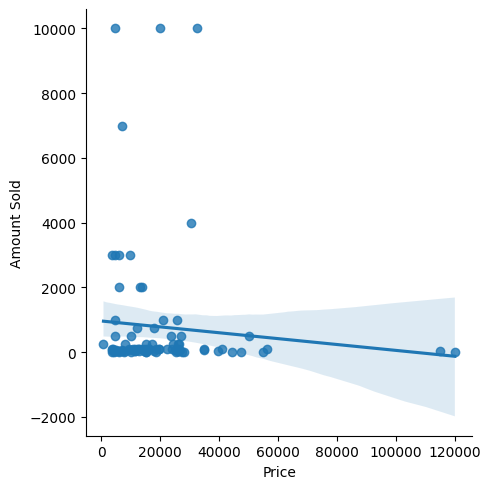

In [89]:
# Plot correlation between price vs amount sold
sns.lmplot(data=data,x='Price', y='Amount Sold')

In [90]:
# Spearman techniques
corr_rho, pval_s = stats.spearmanr(data['Price'], data['Amount Sold'])

# Show results
print("Correlation between price and amount sold:\n")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Correlation between price and amount sold:

rho-correlation: -0.09, p-value: 0.42102338066507994


In [91]:
# Check using pandas
df[['Price', 'Amount Sold']].corr(method='spearman')

,Price,Amount Sold
Price,1.000000,-0.085376
Amount Sold,-0.085376,1.000000


Spearman's correlation is used because both columns have high skewness. From the scattered plot, each point represents the price of a product and the amount sold. The trend shows a downward trend indicating that as the price increases, the amount sold tends to decrease. From the statistical analysis, Spearman's correlation is at -0.09 or -0.08 which indicates a weak negative relationship. The p-value also shows that the correlation between two variables is not significant.

In summary, the analysis indicate a weak negative correlation between the price and amount sold. However, due to the p-values being higher than 0.05, the correlation is not statistically significant. Therefore, correlation between the two variables can't be determined based on this analysis.

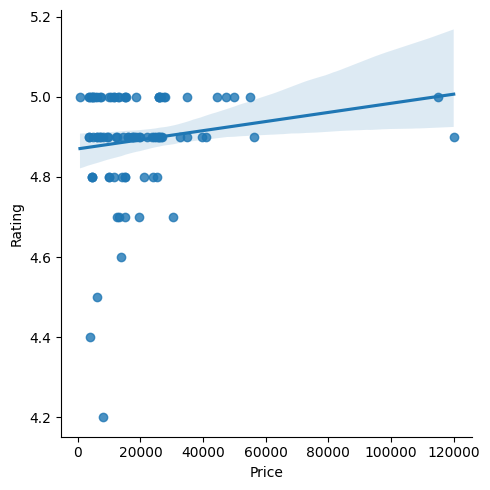

In [92]:
# Plot correlation between price vs rating
sns.lmplot(data=data,x='Price', y='Rating')

In [93]:
# Spearman techniques
corr_rho, pval_s = stats.spearmanr(data['Price'], data['Rating'])

# Show results
print("Correlation between price and rating:\n")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Correlation between price and rating:

rho-correlation: 0.08, p-value: 0.4342546448600786


In [94]:
# Check using pandas
df[['Price', 'Rating']].corr(method='spearman')

,Price,Rating
Price,1.000000,0.082974
Rating,0.082974,1.000000


Spearman's method is used because both variables have high skewness. From the scattered plot, the trend between price and rating indicates a slightly upward trend. Meanwhile from the statistical analysis, Spearman's correlation is at 0.08 which indicates there is a positive relationship between variables. The p-value also shows that the correlation between two variables is not significant (> 0.05). Therefore, based on these analysis, it cannot be concluded that there is a correlation between price and rating for the given data.

#### **E. Conclusion**

The overall takeaway from the provided code is as follows:

- The implementation of web scraping for Seblak products on Tokopedia has been successfully executed.
- The collected data requires cleaning, including tasks such as removing unnecessary parts, adjusting data types, eliminating duplicate and missing values rows, and more.
- The seller's objective is to optimize profit margins from 90% to 95% within a 6-month period through market analysis and dropshipping practices.
- The average and median of the price is Rp19,751.56 and Rp15,000.00.
- The average and median amount of sold products is 782 and 100 products.
- The average and median of the rating is 4.89 and 4.9.
- The price, amount sold, and rating columns are all not distributed normally and have some outliers.
- Based on a 95% confidence level, the potential monthly income from Seblak sales ranges from Rp3,587,150 and Rp20,722,713.
- There is a significant difference in pricing between the Jabodetabek area and other regions. Therefore, selling prices in Jabodetabek area and other regions should be different.
- Analysis reveals no substantial correlations between lower prices and customer preferences. Further analysis is needed to determine the relationship between these two.